In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python import metrics
from sklearn.preprocessing import MinMaxScaler , StandardScaler


In [2]:
readdata = pd.read_csv('/content/sample_data/R80711 (Autosaved).csv', names=['temp'], skiprows=[0])
train = readdata.sample(frac=0.7)
test = readdata.drop(train.index)
train = np.array(train)
test = np.array(test)

# print(testarr)

In [3]:
scaler = MinMaxScaler().fit(train)
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)


In [4]:
def create_dataset(x, look_back=1):
  xs , ys = [] , []

  for i in range(len(x)-look_back):
    v = x[i:i+look_back]
    xs.append(v)
    ys.append(x[i+look_back])
  
  return np.array(xs), np.array(ys)

In [5]:
LOOK_BACK = 1
train_x, train_y = create_dataset(train_scaled,LOOK_BACK) 
test_x, test_y = create_dataset(test_scaled,LOOK_BACK)

In [6]:
# train_x = scaler.transform(train_x)
# test_x = scaler.transform(test_y)

In [7]:
# train_x

In [8]:
def create_GRUmodel():
  model = tf.keras.models.Sequential()
  #input layer
  model.add(tf.keras.layers.GRU(256,
                                return_sequences = True,
                                input_shape=[train_x.shape[1],train_x.shape[2]]))
  model.add(tf.keras.layers.Dropout(0.2))
  #hidden layers
  model.add(tf.keras.layers.Dense(1))
  # compile
  model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
  return model


In [9]:
GRUmodel = create_GRUmodel()

In [10]:
history = GRUmodel.fit(train_x, train_y, epochs=100, validation_split=0.2, shuffle=False)

Epoch 1/100
4/4 [==============================] - 3s 249ms/step - loss: 0.2226 - accuracy: 0.0086 - val_loss: 0.1737 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 23ms/step - loss: 0.1548 - accuracy: 0.0086 - val_loss: 0.1161 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 23ms/step - loss: 0.1037 - accuracy: 0.0086 - val_loss: 0.0749 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0680 - accuracy: 0.0086 - val_loss: 0.0501 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0496 - accuracy: 0.0086 - val_loss: 0.0405 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0445 - accuracy: 0.0086 - val_loss: 0.0411 - val_accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0472 - accuracy: 0.0086 - val_loss: 0.0445 - val_accuracy: 0.

In [11]:
train_y = scaler.inverse_transform(train_y)
test_y = scaler.inverse_transform(test_y)

In [12]:
def prediction(model):
  prediction = model.predict(test_x)
  prediction = scaler.inverse_transform(prediction)
  return prediction

In [13]:
test_x.shape

(62, 1, 1)

In [14]:
preds = GRUmodel.predict(test_x)
preds = preds.reshape(-1,1)
preds = scaler.inverse_transform(preds)

2/2 [==============================] - 1s 9ms/step


In [22]:
test_x.shape

(62, 1, 1)

In [16]:
def plot_future(preds, model, y_test):
  range_future = []
  for i in range(len(preds)):
   range_future.append(i)
  range_future = np.array(range_future)
  range_future.reshape(1,-1)
  plt.plot(range_future,np.array(y_test), label = 'test    data')
  plt.plot(range_future,np.array(preds),label='prediction')


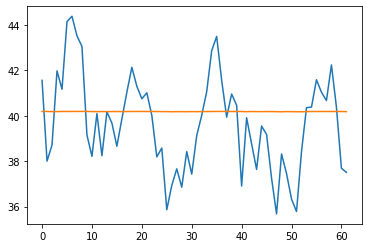

In [17]:
plot_future(preds,GRUmodel,test_y)

In [18]:
def e_pred(preds , actual):
  errors = preds - actual
  mse = np.square(errors).mean()
  rmse = np.sqrt(mse)
  mae = np.abs(errors).mean()
  print(errors)
  print(mae)
  print(mse)


In [ ]:
preds

In [20]:
def prediction(model):
  prediction = model.predict(test_x)
  prediction = scaler.inverse_transform(prediction)
  return prediction